<a href="https://colab.research.google.com/github/JorgeEncinas/lp_numpy/blob/main/LP_Numpy_4_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDF and CDF

From the Normal Distribution
there's also "beta", "gamma"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

In [3]:
x = np.linspace(-6, 6, 1000)

In [4]:
fx = norm.pdf(x, loc=0, scale=1)

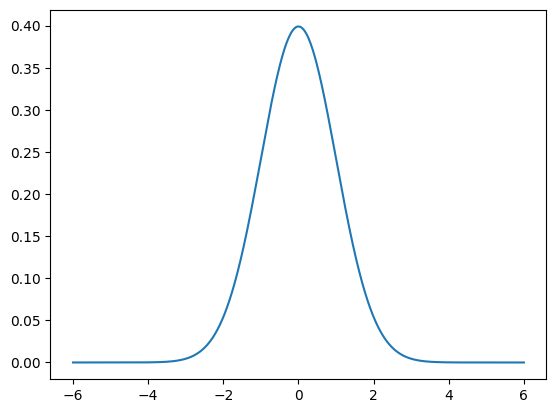

In [5]:
plt.plot(x, fx)

In [6]:
Fx = norm.cdf(x, loc=0, scale=1)

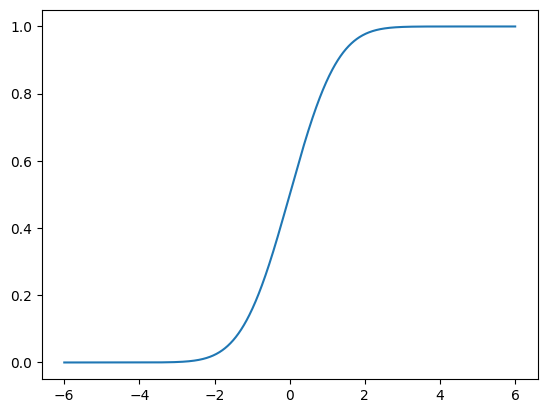

In [7]:
plt.plot(x, Fx);

In [8]:
logfx = norm.logpdf(x, loc=0, scale=1)

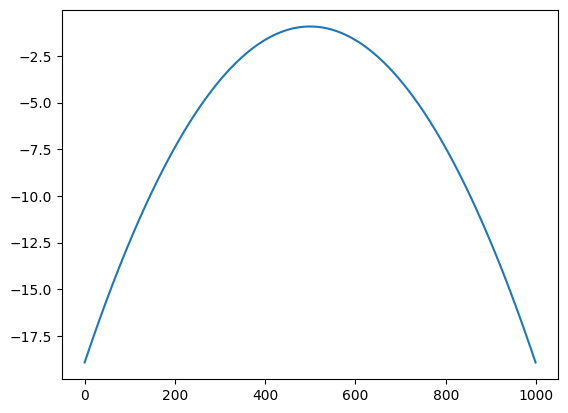

In [9]:
plt.plot(logfx)

## Convolution

I've seen it on CNNs, but it's also there on other things like Signal Processing

In [10]:
from PIL import Image

In [18]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O "lena.png"

--2024-09-11 05:40:58--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.01s   

2024-09-11 05:40:58 (31.6 MB/s) - ‘lena.png’ saved [473831/473831]



In [19]:
im = Image.open("lena.png")

In [21]:
gray = np.mean(im, axis=2)

In [22]:
points = np.linspace(-6, 6, 50)
fx = norm.pdf(points, loc=0, scale=1)

In [23]:
filt = np.outer(fx, fx)

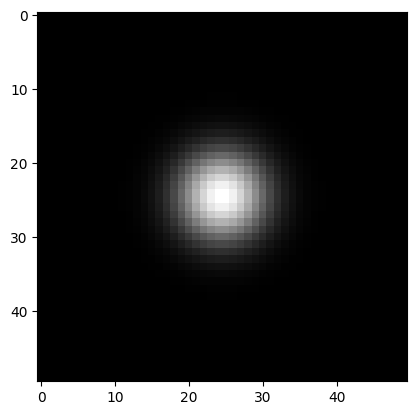

In [24]:
plt.imshow(filt, cmap="gray")

In [25]:
from scipy.signal import convolve2d

In [26]:
out = convolve2d(gray, filt)

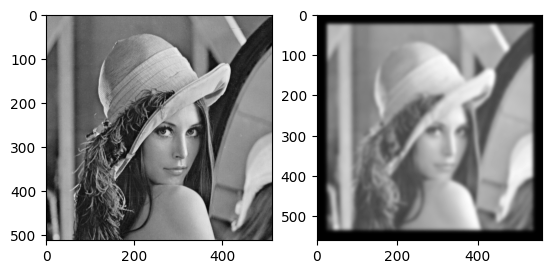

In [27]:
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(out, cmap="gray")

# Exercise: Edge Detection



In [29]:
h_x = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])
h_y = np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]])

In [41]:
step_1 = convolve2d(gray, h_x) #g_x
step_2 = convolve2d(gray, h_y) #g_y
type(step_1), type(step_2)

(numpy.ndarray, numpy.ndarray)

In [42]:
G_prev = np.power(step_1, 2) + np.power(step_1,2)
type(G_prev), G_prev.shape

(numpy.ndarray, (514, 514))

In [43]:
G = np.sqrt(G_prev)

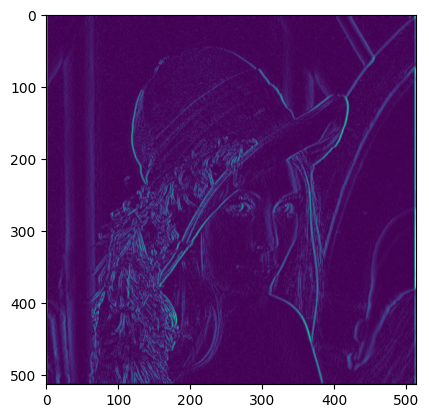

In [44]:
plt.imshow(G)